# Aggregate Random Forest Analysis
Since random forests are randomized by nature of the algorithm, we will be applying a random forest several times (100) to try and determine the actual importance of individual features

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

In [2]:
africa = pd.read_csv('africa-ML_20-12-30.csv')
africa = africa.dropna('columns')
labels = africa['sahoStatusEHA']
data = africa.drop(columns=['sahoStatusEHA', 'country', 'tempDiffS', 'christCountry', 'cumCasesLag1', 'cumCasesLag1P100KC', 'cumDeathsLag1', 'ebolaCasesN', 'gdpPerCap', 'geoDiffXdayNum', 'medDocsN']).select_dtypes(['number'])

train_num = 40

training_data = data[0:train_num]
training_labels = list(labels[0:train_num])

test_data = data[train_num:]
test_labels = list(labels[train_num:])

In [76]:
feature_importance = {}
for i in np.arange(10000):
    rf = RandomForestClassifier(n_estimators = 20, max_depth=5, criterion='entropy')
    rf.fit(training_data, training_labels)
    predictions = rf.predict(test_data)
    # Collect 10 most important features
    importance = pd.DataFrame({'feature': training_data.columns, 'importance': np.round(rf.feature_importances_, 3)})
    importance.sort_values('importance', ascending=False, inplace=True)
    importance = importance[:10]
    # Assign values to dictionary
    for imp in importance.values:
        if imp[0] not in feature_importance.keys():
            # If the key is not already there then add it
            feature_importance[imp[0]] = [imp[1]]
        else:
            feature_importance[imp[0]].append(imp[1])

In [77]:
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index')
final_features = feature_importance_df.agg(['mean', 'std'], axis=1).sort_values('mean', ascending=False)

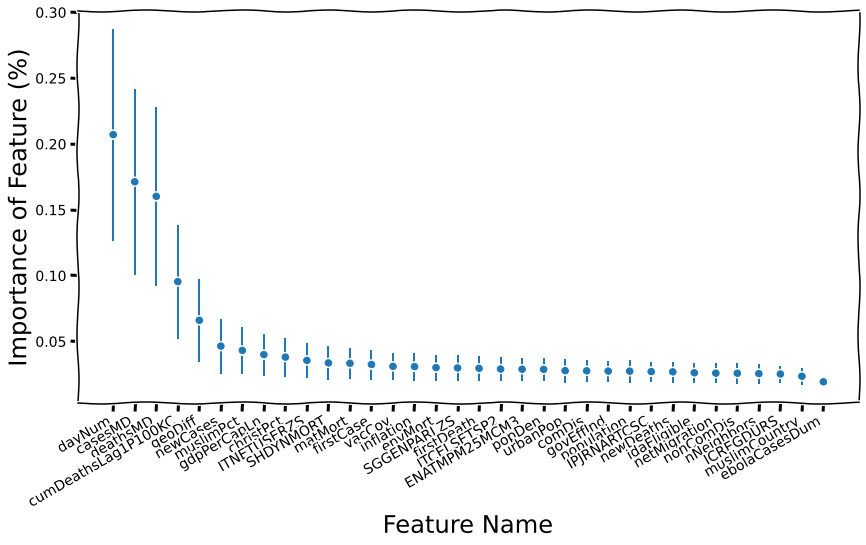

In [78]:
with plt.xkcd():
    fig = plt.figure(figsize=(14,8))
    plt.errorbar(final_features.index, 'mean', yerr='std', data=final_features, fmt='o')
    #plt.xticks(rotation=-60)
    fig.autofmt_xdate()
    plt.xlabel('Feature Name', size='xx-large', fontname='Comic Sans MS')
    plt.ylabel('Importance of Feature (%)', size='xx-large', fontname='Comic Sans MS')
    plt.show()